In [33]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_dir = "C:/Users/homel/OneDrive - Universidad San Sebastian/Escritorio/DeepNeuralNetworkUSS/Projects/Supermarket/data/items_prepared/train_reduced_balanced"

In [35]:
image_size = (64, 64)  # Puedes ajustarlo si quieres más resolución

X, y = [], []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # escala de grises
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"Total imágenes cargadas: {len(X)}")

Total imágenes cargadas: 822


In [36]:
# Convertir etiquetas a números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separar en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [37]:
# Entrenar el modelo
model = SVC(kernel='rbf', C=1.0)  # También puedes probar con 'rbf'
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



📊 Clasificación:
                 precision    recall  f1-score   support

    Apple Green       0.00      0.00      0.00        21
      Apple Red       0.37      0.79      0.50        33
    Juice_Bravo       0.67      0.60      0.63        20
Juice_GodMorgon       0.88      0.75      0.81        20
Juice_Tropicana       0.57      0.40      0.47        20
          Melon       0.41      0.45      0.43        31
           Pear       0.29      0.10      0.15        20

       accuracy                           0.47       165
      macro avg       0.46      0.44      0.43       165
   weighted avg       0.44      0.47      0.43       165



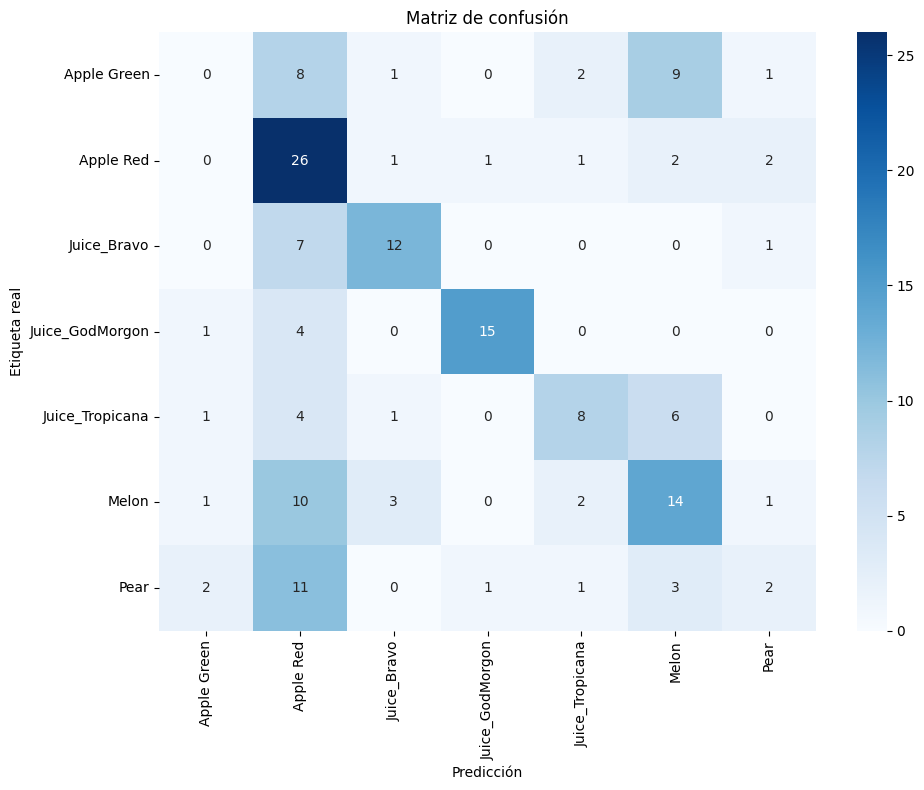

In [38]:
y_pred = model.predict(X_test)

print("\n📊 Clasificación:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.tight_layout()
plt.show()